Solution found in 10 steps:
Step 0: X: 0, Y: 0


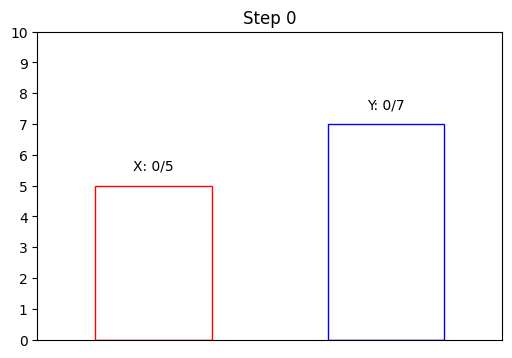

Step 1: X: 0, Y: 7


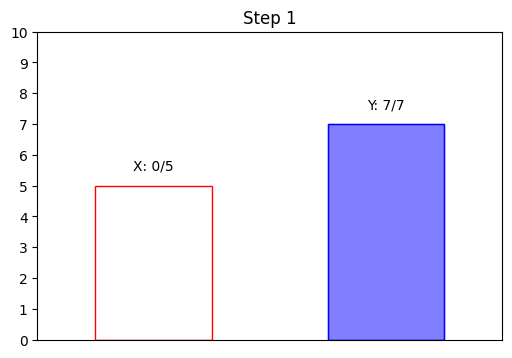

Step 2: X: 5, Y: 2


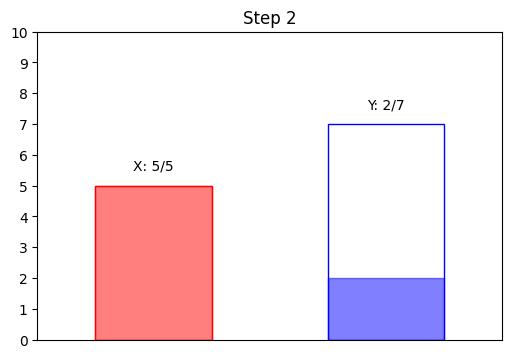

Step 3: X: 0, Y: 2


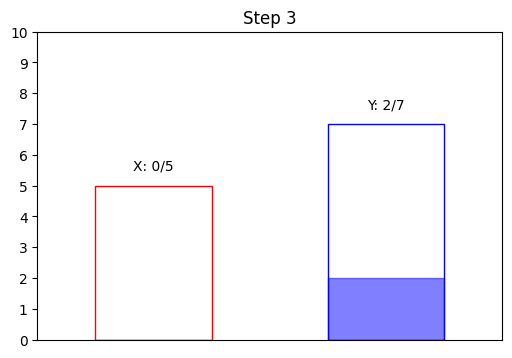

Step 4: X: 2, Y: 0


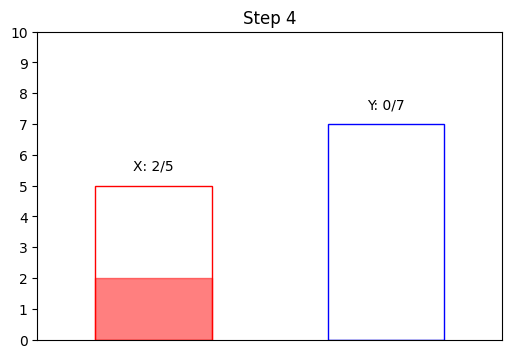

Step 5: X: 2, Y: 7


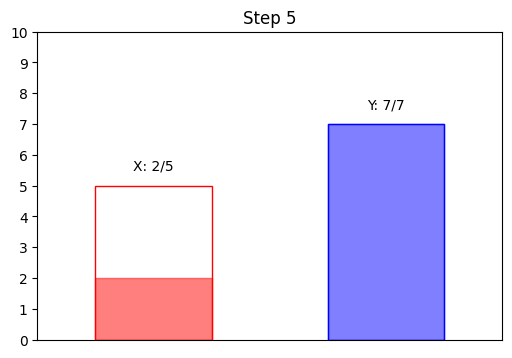

Step 6: X: 5, Y: 4


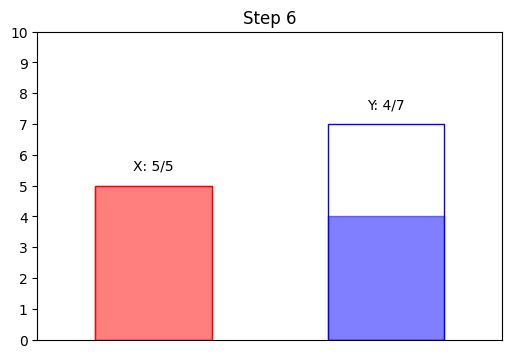

Step 7: X: 0, Y: 4


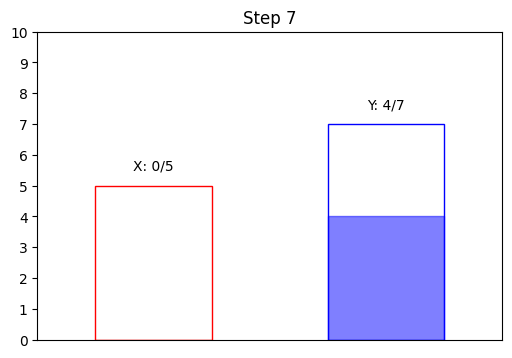

Step 8: X: 4, Y: 0


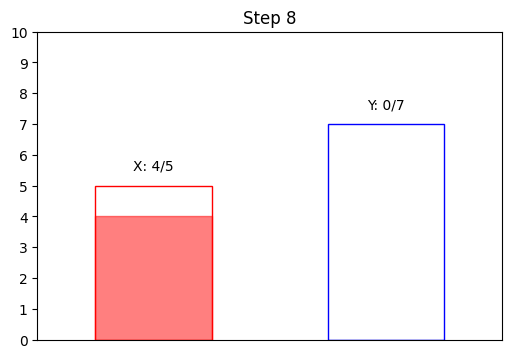

Step 9: X: 4, Y: 7


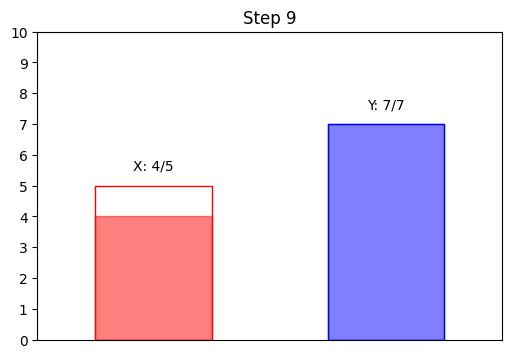

Step 10: X: 5, Y: 6


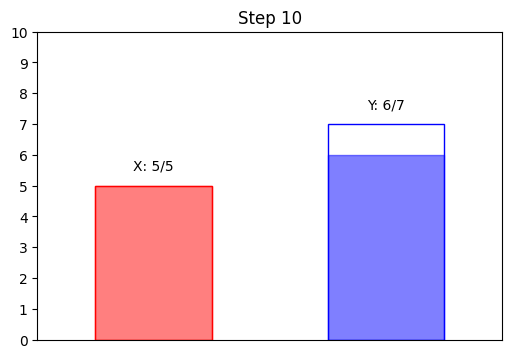

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from collections import deque
%matplotlib inline

def solve(capacity_x, capacity_y, target):
    queue = deque([(0, 0, [])])
    visited = set()

    while queue:
        x, y, path = queue.popleft()
        
        if x == target or y == target:
            return path + [(x, y)]
        
        if (x, y) in visited:
            continue
        visited.add((x, y))
        
        next_states = [
            (capacity_x, y), (x, capacity_y),
            (0, y), (x, 0),
            (min(x + y, capacity_x), max(0, x + y - capacity_x)),
            (max(0, x + y - capacity_y), min(x + y, capacity_y))
        ]
        
        for next_x, next_y in next_states:
            queue.append((next_x, next_y, path + [(x, y)]))
    
    return None

def visualize_step(capacity_x, capacity_y, x, y, step):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 10)  # Increased Y-axis length to 6 without changing capacities
    ax.set_xticks([])
    ax.set_yticks(range(0, 11))  # Adjusted the ticks for the new Y-axis length
    
    # Draw jug X
    ax.add_patch(Rectangle((0.25, 0), 0.5, capacity_x, fill=False, color='red'))
    ax.add_patch(Rectangle((0.25, 0), 0.5, x, fill=True, color='red', alpha=0.5))
    
    # Draw jug Y
    ax.add_patch(Rectangle((1.25, 0), 0.5, capacity_y, fill=False, color='blue'))
    ax.add_patch(Rectangle((1.25, 0), 0.5, y, fill=True, color='blue', alpha=0.5))
    
    ax.text(0.5, capacity_x + 0.5, f"X: {x}/{capacity_x}", ha='center')
    ax.text(1.5, capacity_y + 0.5, f"Y: {y}/{capacity_y}", ha='center')
    ax.set_title(f"Step {step}")
    
    plt.show()

# Set up the problem
capacity_x, capacity_y, target = 5, 7, 6  # Kept capacities the same

# Solve the problem
solution = solve(capacity_x, capacity_y, target)

if solution:
    print(f"Solution found in {len(solution) - 1} steps:")
    for step, (x, y) in enumerate(solution):
        print(f"Step {step}: X: {x}, Y: {y}")
        visualize_step(capacity_x, capacity_y, x, y, step)
else:
    print("No solution found.")
